In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/heikkijian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
# Load preprocessed data
df = pd.read_csv("coursera_reviews_processed.csv")

In [49]:
df.head()

,reviews,reviewers,date_reviews,rating,course_id,processed_reviews
0,I struggled with some of the instruction as I ...,By Janny v R J,"Apr 01, 2016",3.0,python,struggl instruct get exercis quiz work right e...
1,Sir is an amazing teacher and expresses his id...,By Aman V,"Apr 01, 2016",4.0,python,sir amaz teacher express idea clear
2,"I recommend widely this course, it reaches ver...",By Angélica S,"Apr 01, 2016",5.0,food-and-health,recommend wide cours reach import inform weste...
3,"If you no nothing about this topic, lectures a...",By Jolana L,"Apr 01, 2016",5.0,food-and-health,noth topic lectur good
4,Highly recommended course!,By Narine A,"Apr 01, 2016",5.0,food-and-health,high recommend cours


In [50]:
dt=pd.read_csv('Coursera_courses.csv')

In [51]:
dt.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


# 4.1 Overview of Courses and Reviews


d1=dt.groupby('institution').size().sort_values(ascending=False)

In [52]:
d1=dt.groupby('institution').size()

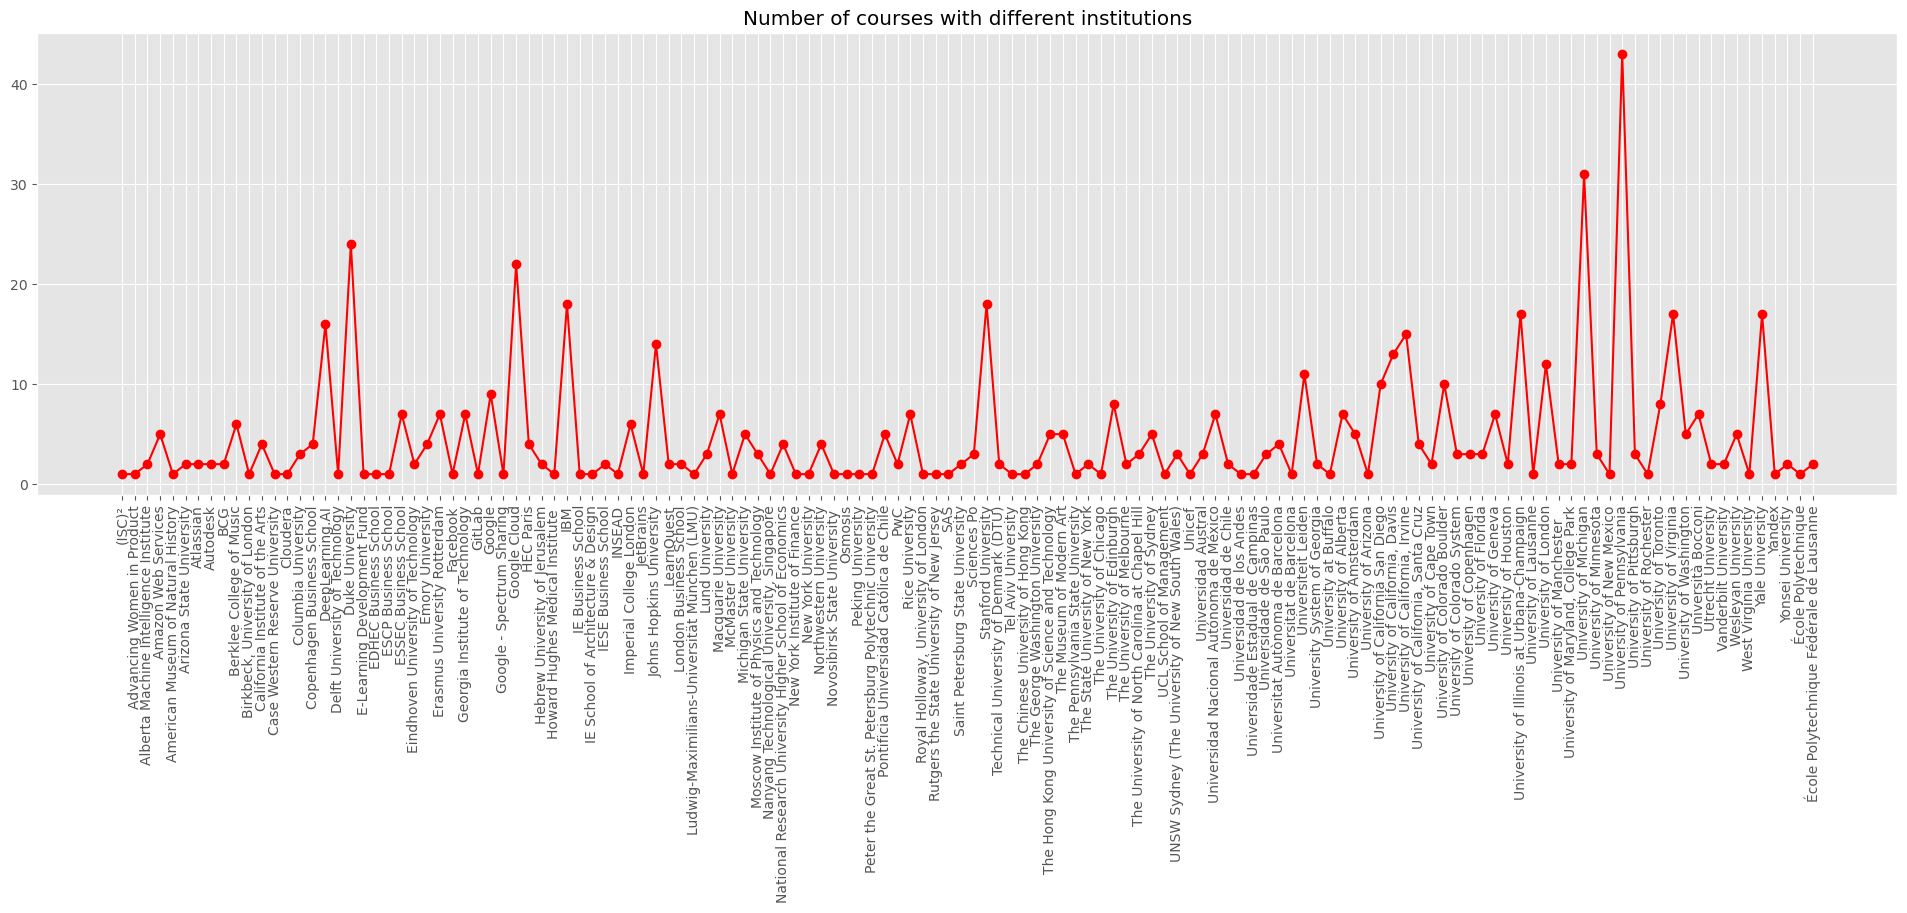

In [53]:
plt.figure(figsize=(24,6))
plt.plot(d1.index,d1.values,'r-o')
plt.xticks(rotation=90)
plt.title('Number of courses with different institutions')
plt.show()

In [54]:
d2=d1.sort_values(ascending=False).iloc[:20]

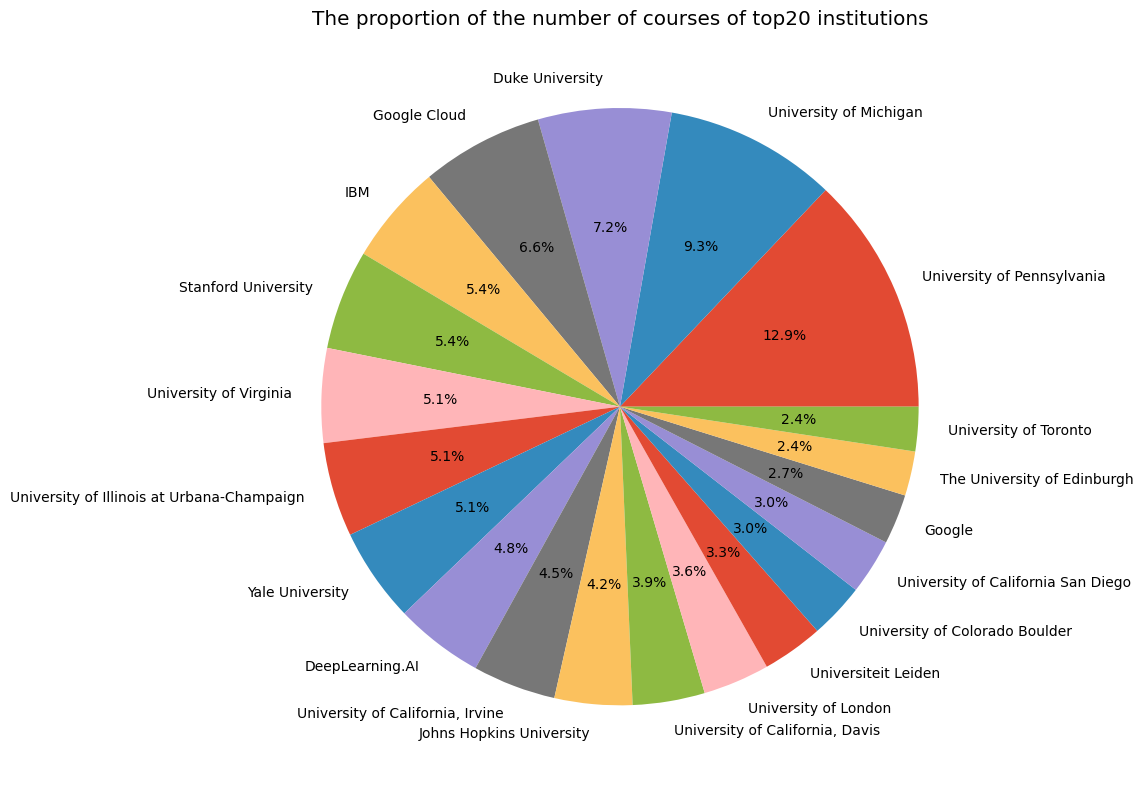

In [55]:
plt.figure(figsize=(12,8))
plt.pie(d2.values, labels=d2.index, autopct='%1.1f%%')
plt.title('The proportion of the number of courses of top20 institutions')
plt.tight_layout()
plt.show()

In [56]:
total_courses = d1.sum()
top20_courses = d1.sort_values(ascending=False).iloc[:20].sum()
percentage = top20_courses / total_courses * 100
print('The proportion of the number of courses of top20 institutions：{:.1f}%'.format(percentage))

The proportion of the number of courses of top20 institutions：53.5%


In [57]:
d3=df.groupby('course_id').size().sort_values(ascending=False).iloc[:10]

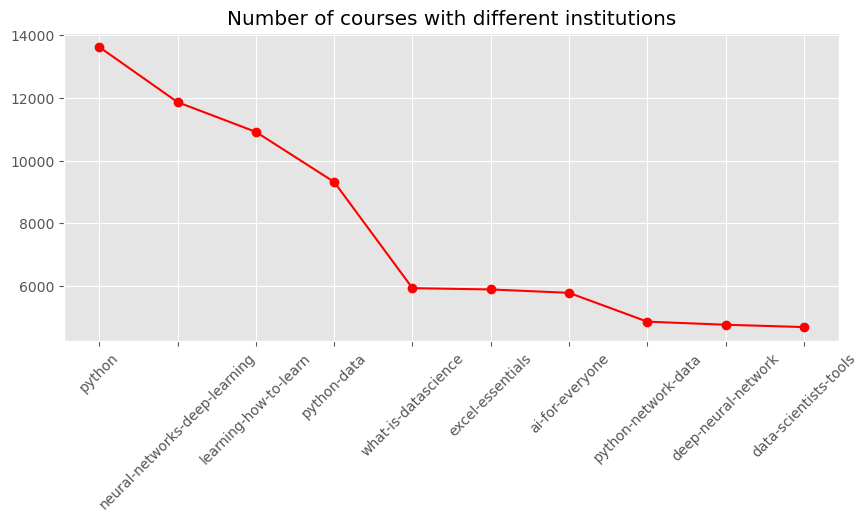

In [58]:
plt.figure(figsize=(10,4))
plt.plot(d3.index,d3.values,'r-o')
plt.xticks(rotation=45)
plt.title('Number of courses with different institutions')
plt.show()

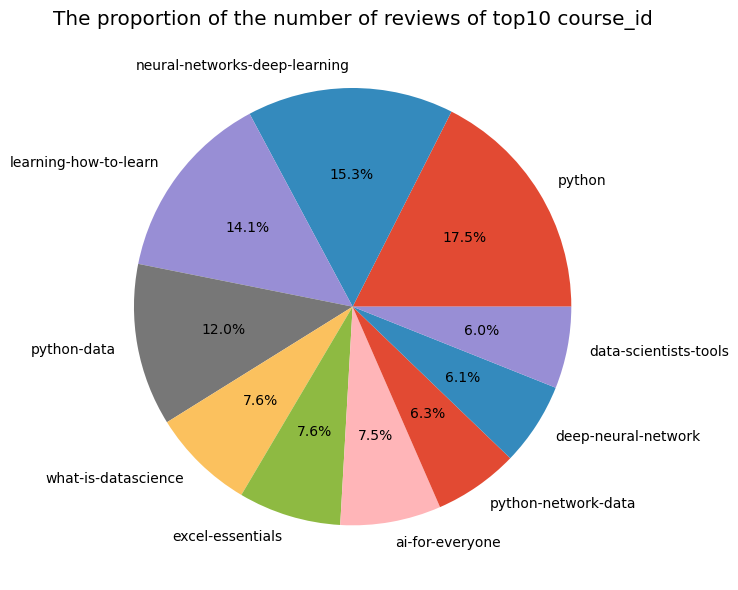

In [59]:
plt.figure(figsize=(10,6))
plt.pie(d3.values, labels=d3.index, autopct='%1.1f%%')
plt.title('The proportion of the number of reviews of top10 course_id')
plt.tight_layout()
plt.show()

In [60]:
d4=dt[dt['institution']==d2.index[0]].name.values

In [61]:

token_counts = Counter(d4)

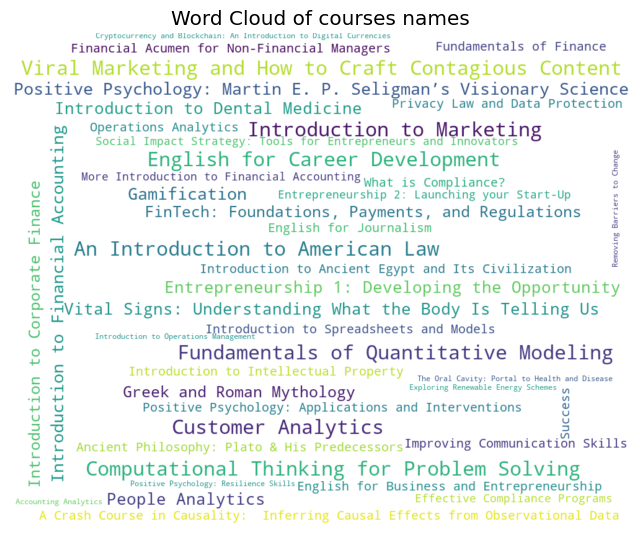

In [62]:
wordcloud = WordCloud(width=1000, height=800, background_color="white").generate_from_frequencies(token_counts)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of courses names")
plt.show()

In [63]:
d5=df.groupby('course_id').size()

In [64]:
d5.mean()

934.9645161290323

In [65]:
d5.std()

1585.5406993882025

In [66]:
d6=df.groupby('rating').size()

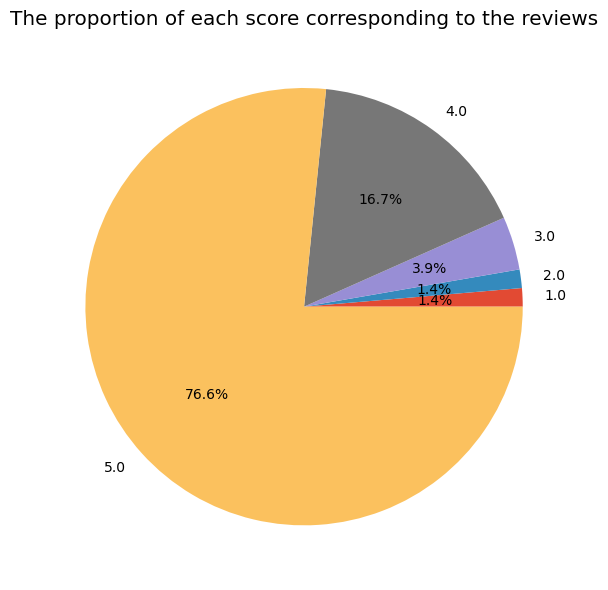

In [67]:
plt.figure(figsize=(10,6))
plt.pie(d6.values, labels=d6.index, autopct='%1.1f%%')
plt.title('The proportion of each score corresponding to the reviews')
plt.tight_layout()
plt.show()

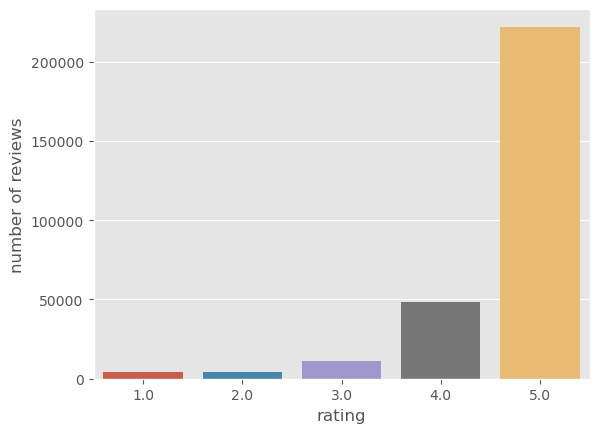

In [68]:
sns.barplot(x=d6.index,y=d6.values)
plt.ylabel('number of reviews')
plt.show()

# 4.2 Review Visualization


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
 

In [70]:
corpus = df['processed_reviews'].dropna().values
 
 
Count_Vectorizer = CountVectorizer(stop_words=None)
Count_Vectorizer.fit_transform(corpus)
worddic=Count_Vectorizer.vocabulary_

In [71]:
worddicsort=sorted(worddic.items(),key=lambda x:x[1],reverse=True)[2:]

In [72]:
for k,v in worddicsort[:10]:
    print(k,':',v)

zveren : 34028
zurich : 34027
zuijdewijn : 34026
zuckerberg : 34025
zubair : 34024
zu : 34023
zsh : 34022
zryan : 34021
zquez : 34020
zork : 34019


In [73]:
df.head()

,reviews,reviewers,date_reviews,rating,course_id,processed_reviews
0,I struggled with some of the instruction as I ...,By Janny v R J,"Apr 01, 2016",3.0,python,struggl instruct get exercis quiz work right e...
1,Sir is an amazing teacher and expresses his id...,By Aman V,"Apr 01, 2016",4.0,python,sir amaz teacher express idea clear
2,"I recommend widely this course, it reaches ver...",By Angélica S,"Apr 01, 2016",5.0,food-and-health,recommend wide cours reach import inform weste...
3,"If you no nothing about this topic, lectures a...",By Jolana L,"Apr 01, 2016",5.0,food-and-health,noth topic lectur good
4,Highly recommended course!,By Narine A,"Apr 01, 2016",5.0,food-and-health,high recommend cours


In [74]:
df['processed_reviews']=df['processed_reviews'].apply(str)

In [75]:
df['head']=df['processed_reviews'].apply(lambda x:x.split()[0])
df['tail']=df['processed_reviews'].apply(lambda x:x.split()[-1])

In [76]:
c1=Counter(list(df['head'].values))

In [77]:
h1=c1.most_common(10)

In [78]:
h1=list(zip(*h1))

In [79]:
h1=pd.DataFrame(h1).T

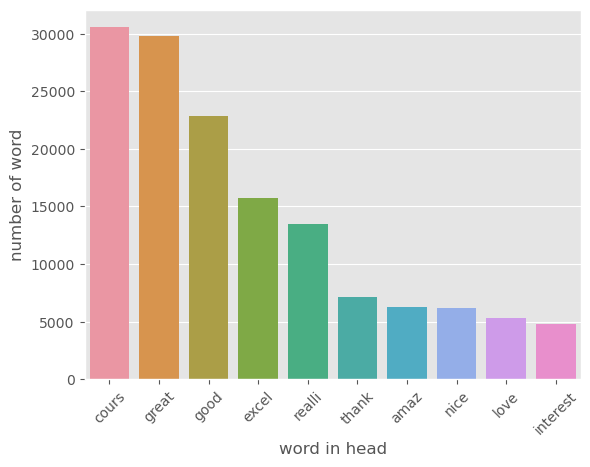

In [80]:
sns.barplot(x=h1[0],y=h1[1])
plt.xlabel('word in head')
plt.ylabel('number of word')
plt.xticks(rotation=45)
plt.show()

In [81]:
c2=Counter(list(df['tail'].values))

In [82]:
t1=c2.most_common(10)

In [83]:
t1=list(zip(*t1))

In [84]:
t1=pd.DataFrame(t1).T

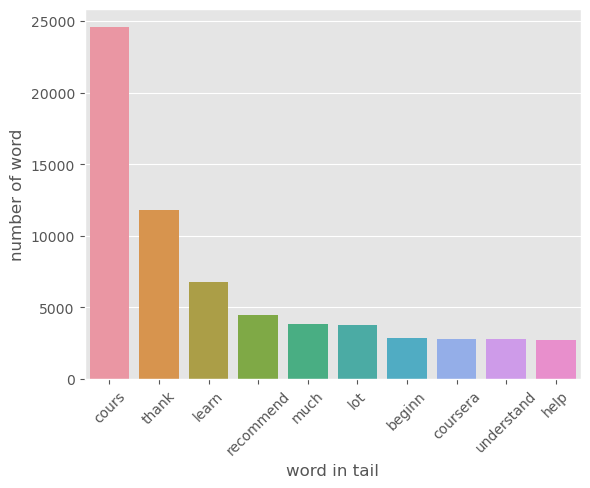

In [85]:
sns.barplot(x=t1[0],y=t1[1])
plt.xlabel('word in tail')
plt.ylabel('number of word')
plt.xticks(rotation=45)
plt.show()

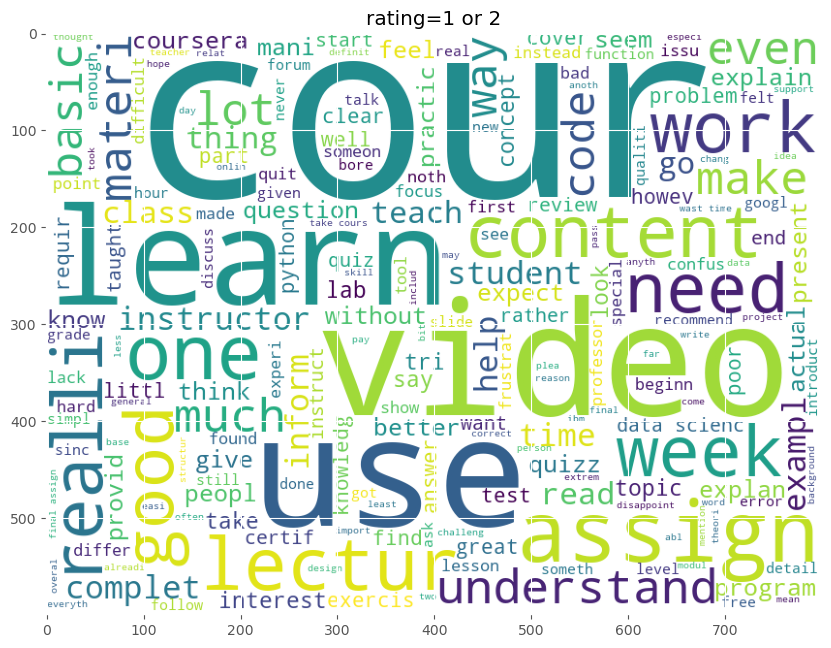

In [86]:

d7=df[(df['rating']==1)|(df['rating']==2)]

ciyun=''.join(list(d7['processed_reviews'].values))

cloud=WordCloud(background_color='white',width=800,height=600).generate(ciyun)
cloud.to_file(f'ciyun12.png')
import matplotlib.pyplot as plt
import matplotlib.image as pli
image = plt.imread('ciyun12.png') 
plt.figure(figsize=(10,8))
plt.title(f'rating=1 or 2')
plt.imshow(image)
plt.show()

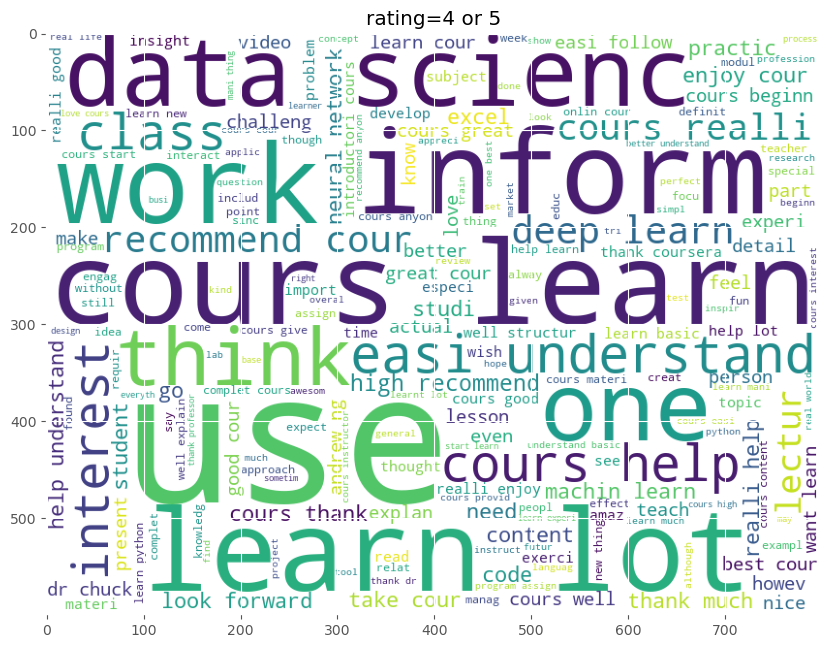

In [87]:

d7=df[(df['rating']==4)|(df['rating']==5)]

ciyun=''.join(list(d7['processed_reviews'].values))

cloud=WordCloud(background_color='white',width=800,height=600).generate(ciyun)
cloud.to_file(f'ciyun45.png')
import matplotlib.pyplot as plt
import matplotlib.image as pli
image = plt.imread('ciyun45.png') 
plt.figure(figsize=(10,8))
plt.title(f'rating=4 or 5')
plt.imshow(image)
plt.show()

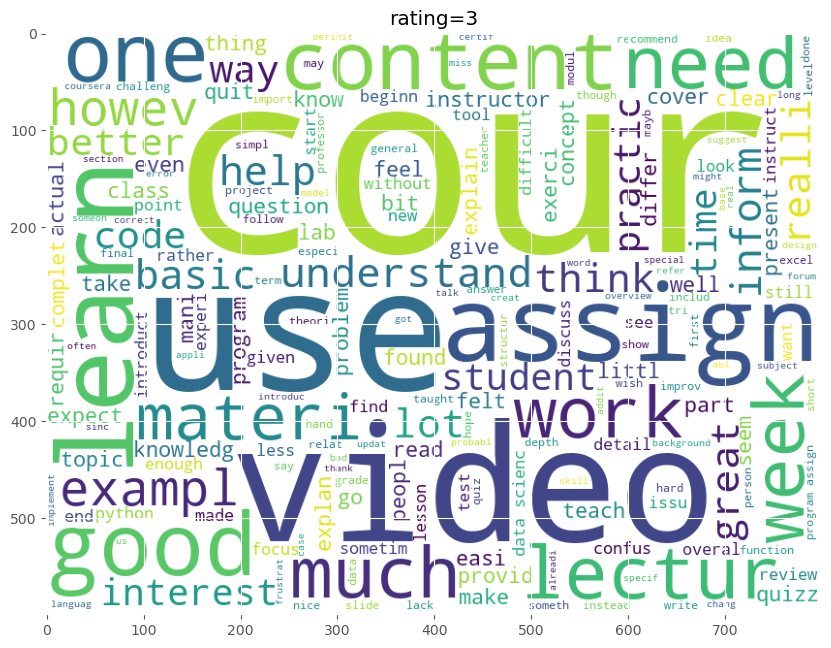

In [88]:
d7=df[df['rating']==3]

ciyun=''.join(list(d7['processed_reviews'].values))

cloud=WordCloud(background_color='white',width=800,height=600).generate(ciyun)
cloud.to_file(f'ciyun3.png')
import matplotlib.pyplot as plt
import matplotlib.image as pli
image = plt.imread('ciyun3.png') 
plt.figure(figsize=(10,8))
plt.title(f'rating=3')
plt.imshow(image)
plt.show()

In [89]:
df['reviews_lenght']=df['reviews'].apply(len)

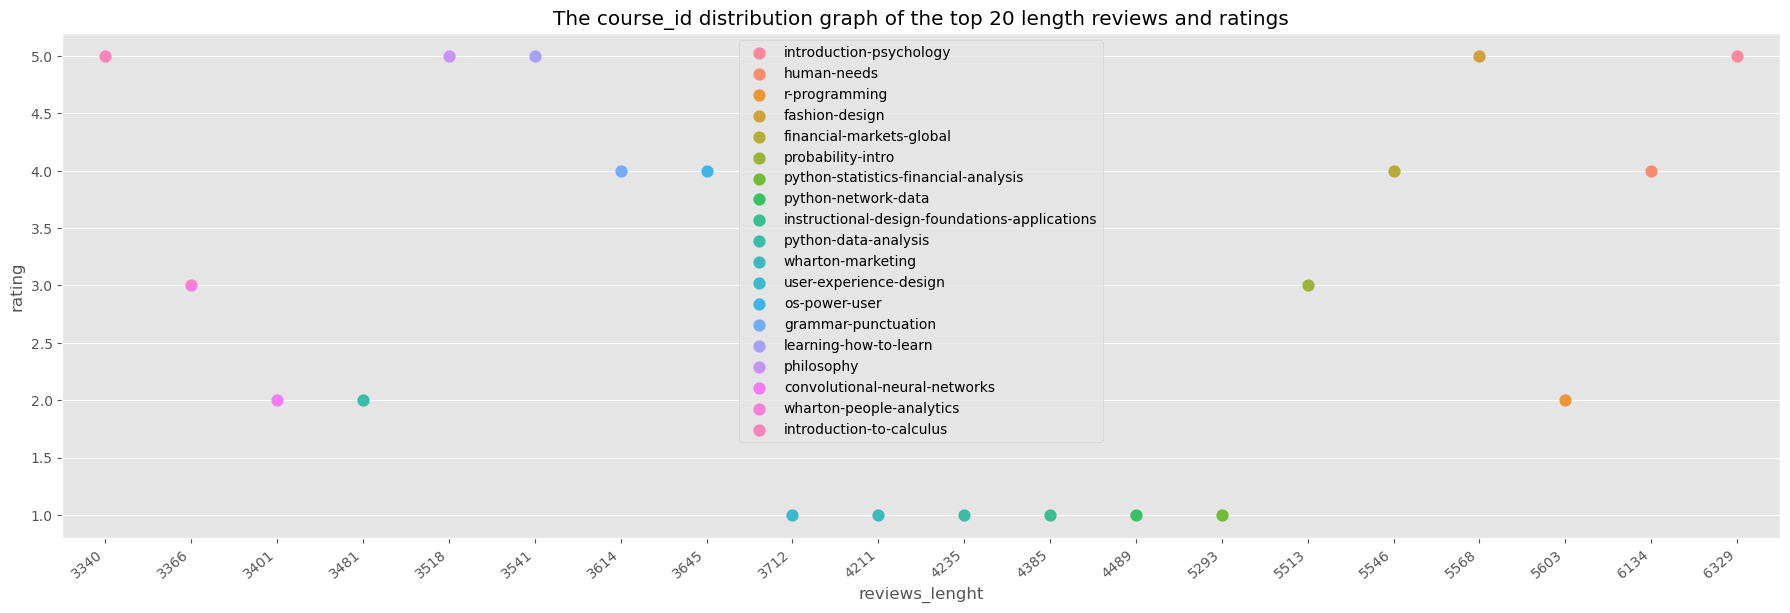

In [90]:
plt.figure(figsize=(18,6))
movie_df= df.sort_values(by ='reviews_lenght' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(movie_df_new['reviews_lenght'], movie_df_new['rating'], hue=movie_df_new['course_id'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend()
plt.tight_layout()
plt.title('The course_id distribution graph of the top 20 length reviews and ratings')
plt.show()